# Kenya Conflict Event

## Exploratory Data Analysis

**Author:** Abdel An'lah TIDJANI

**Date:** December 31,2021


### Notebook Configuration

In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from glob import glob
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from Wrangledata import wrangle #Our function

In [2]:
# Number of rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

### Load Data

In [3]:
# Load data
dataset_name = glob('data/*Kenya.csv')[0]
df = wrangle(dataset_name)

### Inspect the Structure
The data frame contains 18 attributes, and 7,701 observations.

In [4]:
print("Shape of the data:", df.shape)
Rows,Cols=df.shape
df.head()

Shape of the data: (7701, 18)


event_date  year event_type    sub_event_type                        actor1  \
0 2021-11-17  2021   Protests  Peaceful protest            Protesters (Kenya)   
1 2021-11-16  2021   Protests  Peaceful protest            Protesters (Kenya)   
2 2021-11-16  2021   Protests  Peaceful protest            Protesters (Kenya)   
3 2021-11-10  2021      Riots      Mob violence               Rioters (Kenya)   
4 2021-11-10  2021    Battles       Armed clash  Pokot Ethnic Militia (Kenya)   

              inter1                                             actor2  \
0         protesters                                                NaN   
1         protesters                                                NaN   
2         protesters                                                NaN   
3            rioters                                  Civilians (Kenya)   
4  communal militias  Police Forces of Kenya (2013-) General Service...   

         inter2                       interaction      admin1         admin2  \
0   no victicme             sole protester action  Tana River           Bura   
1   no victicme             sole protester action        Lamu      Lamu West   
2   no victicme             sole protester action     Garissa        Garissa   
3     civilians          rioters versus civilians      Nakuru   Nakuru North   
4  state forces  military versus communal militia    Laikipia  Laikipia West   

   location  latitude  longitude                                source  \
0    Madogo   -0.4711    39.5952                      The Star (Kenya)   
1      Lamu   -2.2717    40.9020                      The Star (Kenya)   
2   Garissa   -0.4536    39.6461                      The Star (Kenya)   
3    Nakuru   -0.2441    36.1420  Daily Nation (Kenya); Kenya Standard   
4  Ol-moran    0.5368    36.4880  Daily Nation (Kenya); Kenya Standard   

  source_scale                                              notes  fatalities  
0     National  On 17 November 2021, members from Munyo Yaya c...           0  
1     National  On 16 November 2021, local residents marched t...           0  
2     National  On 16 November 2021, more than 200 cereal trad...           0  
3     National  On 10 November 2021, local residents burnt and...           2  
4     National  On 10 November 2021, armed pokot militia attac...           4

In [5]:
df.columns

Index(['event_date', 'year', 'event_type', 'sub_event_type', 'actor1',
       'inter1', 'actor2', 'inter2', 'interaction', 'admin1', 'admin2',
       'location', 'latitude', 'longitude', 'source', 'source_scale', 'notes',
       'fatalities'],
      dtype='object')

### Map of conflict event in Kenya.

In [6]:
# Plot Mapbox location and event type

fig = px.scatter_mapbox(
    df, # Our DataFrame
    lat="latitude",
    lon="longitude",
    width=1000, # Width of map
    height=700, # Height of map
    # size="fatalities",
    color="event_type",
    hover_data=["interaction","year","fatalities","location"], # Display notes when hovering mouse over event
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

### Data explore

>#### Event

In [7]:
# number of records

print("event county count:",df["admin1"].nunique())
print("event state count:",df["admin2"].nunique())
print("event type count:",df["event_type"].nunique())
print("event sub_event_type count:",df["sub_event_type"].nunique())

event county count: 47
event state count: 287
event type count: 6
event sub_event_type count: 24


In [8]:
event_type=df["event_type"].value_counts()
event_type

Violence against civilians    1988
Riots                         1961
Protests                      1796
Battles                       1472
Explosions/Remote violence     253
Strategic developments         231
Name: event_type, dtype: int64

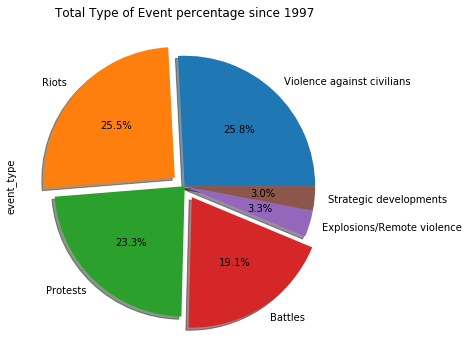

In [9]:
explode = (0,0.1, 0, 0.1, 0,0)  #

event_type.plot(kind="pie", explode=explode, labels=event_type.index, autopct='%1.1f%%',figsize=(9,6),
        shadow=True, startangle=0)
plt.title('Total Type of Event percentage since 1997') ;

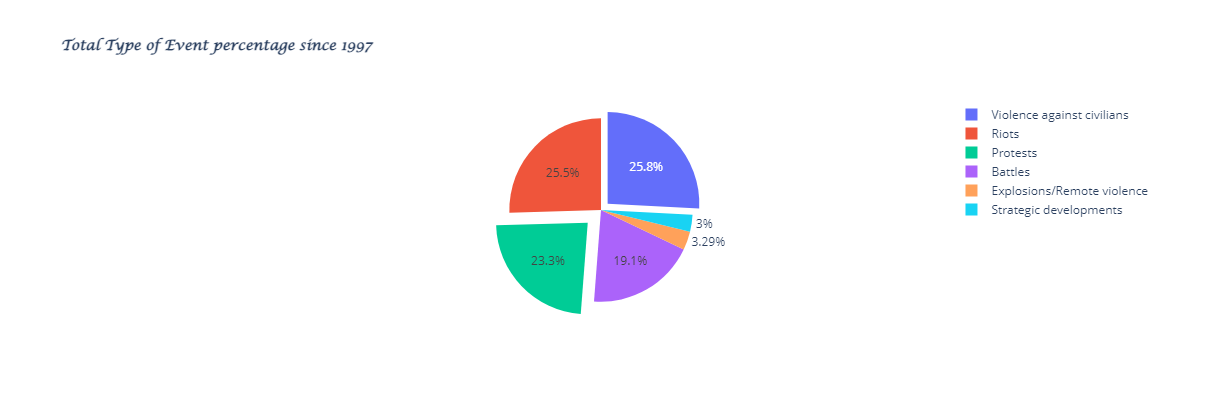

In [10]:
# Interactive with plotly

fig = go.Figure(data=[go.Pie(labels=event_type.index, 
                             values=event_type, 
                             pull=[0.1, 0, 0.2,0, 0,0])])
fig.update_layout(
    title_text="<b>Total Type of Event percentage since 1997<b>",
    titlefont={'size': 14, 'family':'Serif'},
    # autosize=False,
    width=600,
    height=400,)

In [11]:
# event and sub_event 

sub_event=df.groupby(["event_type","sub_event_type"])["event_date"].agg({'count'}).reset_index()
sub_event

event_type                       sub_event_type  count
0                      Battles                          Armed clash   1465
1                      Battles         Government regains territory      4
2                      Battles  Non-state actor overtakes territory      3
3   Explosions/Remote violence                     Air/drone strike      3
4   Explosions/Remote violence                              Grenade     72
5   Explosions/Remote violence        Remote explosive/landmine/IED    153
6   Explosions/Remote violence    Shelling/artillery/missile attack     21
7   Explosions/Remote violence                         Suicide bomb      4
8                     Protests   Excessive force against protesters     62
9                     Protests                     Peaceful protest   1492
10                    Protests            Protest with intervention    242
11                       Riots                         Mob violence    778
12                       Riots                Violent demonstration   1183
13      Strategic developments                            Agreement      7
14      Strategic developments                              Arrests     25
15      Strategic developments             Change to group/activity     54
16      Strategic developments                Disrupted weapons use     40
17      Strategic developments     Headquarters or base established      6
18      Strategic developments         Looting/property destruction     60
19      Strategic developments    Non-violent transfer of territory      8
20      Strategic developments                                Other     31
21  Violence against civilians       Abduction/forced disappearance     70
22  Violence against civilians                               Attack   1893
23  Violence against civilians                      Sexual violence     25

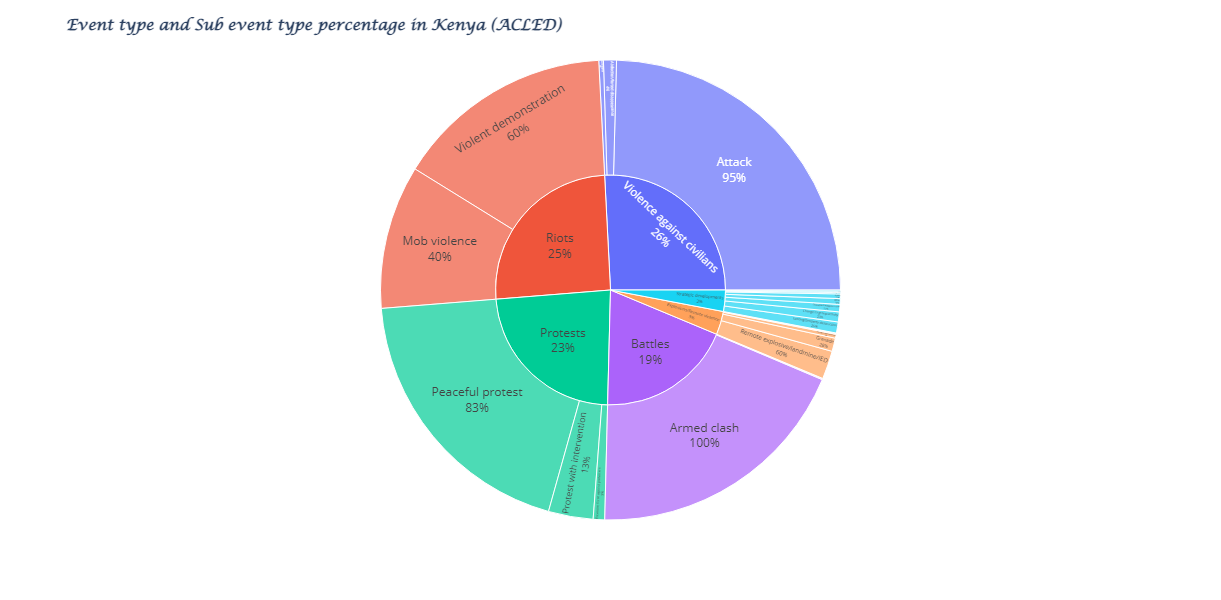

In [12]:
# Event type and Sub event type visualisation 

fig = px.sunburst(sub_event, 
                  path=['event_type', 'sub_event_type'], 
                  values='count',
                 width=600, # Width of map
                height=600,)
fig.update_traces(textinfo="label+percent parent")
fig.layout.update(title="<b> Event type and Sub event type percentage in Kenya (ACLED)<b>",
                  titlefont={'color':None, 'size': 15, 'family': 'San-Serif'},
                  # showlegend=False, 
                  # height=500, 
                  # width=750,
                  )
fig.show()

>#### Actor type involved

In [13]:
actor_type1=df["inter1"].value_counts()
actor_type1

rioters               1828
protesters            1747
communal militias     1316
political militias    1265
state forces          1065
rebel groups           410
other forces            69
civilians                1
Name: inter1, dtype: int64

In [14]:
actor_type2=df["inter2"].value_counts()
actor_type2

civilians             2693
no victicme           2080
state forces          1391
communal militias      586
political militias     335
rioters                300
rebel groups           235
protesters              54
other forces            27
Name: inter2, dtype: int64

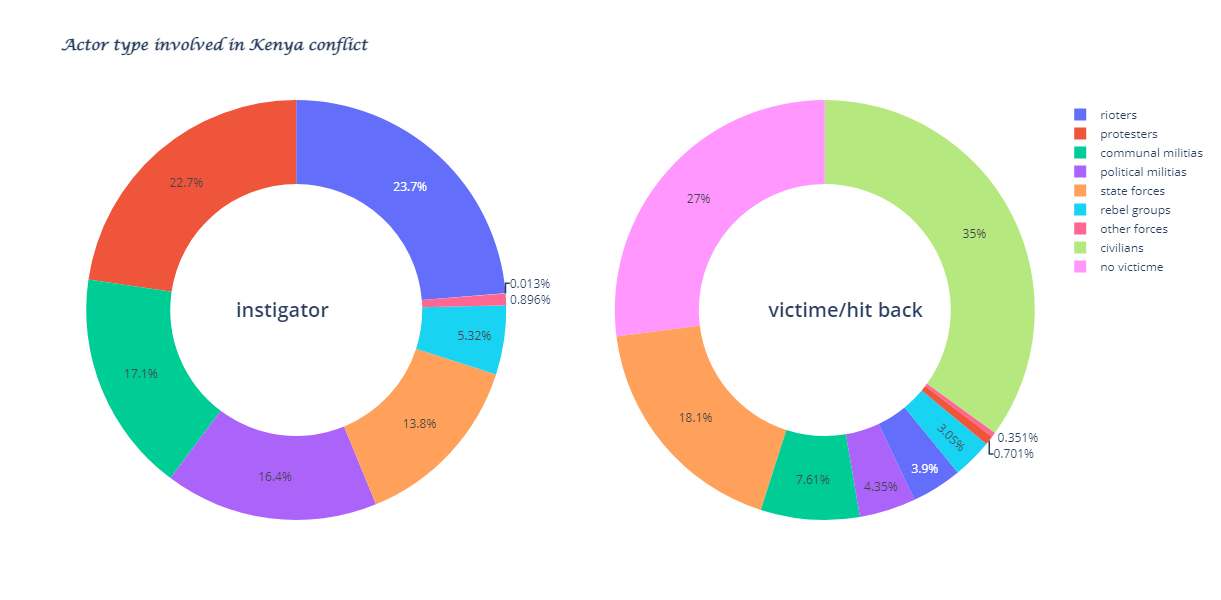

In [15]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=actor_type1.index, values=actor_type1,name="Actor type1"),1,1)
fig.add_trace(go.Pie(labels=actor_type2.index, values=actor_type2,name="Actor type2"),1,2)
fig.update_traces(hole=.6, hoverinfo="label+percent+name") # Use `hole` to create a donut-like pie chart
fig.update_layout(
    title_text="<b>Actor type involved in Kenya conflict<b>",
    titlefont={'size': 15, 'family':'Serif'},
    uniformtext_minsize=12,
    uniformtext_mode='hide',
#     autosize=False,
    width=1000,
    height=600,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='<b>instigator', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='<b>victime/hit back', x=0.88, y=0.5, font_size=20, showarrow=False)])

>#### Conflict trend

Let look at the trend of conflict  

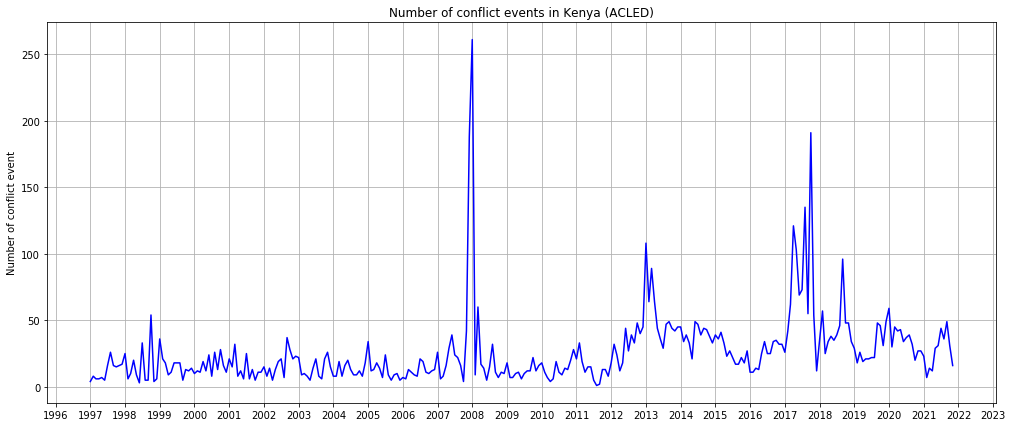

In [16]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Add labels to the plot
style = dict(size=12, color='black')

fig, ax = plt.subplots(figsize=(17, 7))

number_ev=df["event_type"].groupby([df['event_date'].dt.year.rename('year'), 
             df['event_date'].dt.month.rename('month')]).agg({'count'})

number_ev.index = [pd.datetime(year, month,1)
                   for (year,month) in number_ev.index]

number_ev.reset_index(inplace=True)

ax.plot('index','count', data=number_ev,color="b")

# Format the x axis 
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))

ax.grid(True)
plt.ylabel("Number of conflict event")
plt.title("Number of conflict events in Kenya (ACLED)");

### Analysis from 2000 to present

In [17]:
df=df[df["year"]>1999]
df.tail()

event_date  year                  event_type  \
7181 2000-01-15  2000      Strategic developments   
7182 2000-01-07  2000  Violence against civilians   
7183 2000-01-06  2000                       Riots   
7184 2000-01-05  2000      Strategic developments   
7185 2000-01-03  2000                     Battles   

                    sub_event_type                               actor1  \
7181                         Other           LRA: Lords Resistance Army   
7182                        Attack  Unidentified Ethnic Militia (Kenya)   
7183         Violent demonstration                      Rioters (Kenya)   
7184  Looting/property destruction  Unidentified Ethnic Militia (Kenya)   
7185                   Armed clash   Police Forces of Kenya (1978-2002)   

                 inter1                                  actor2  \
7181       rebel groups                                     NaN   
7182  communal militias                       Civilians (Kenya)   
7183            rioters      Police Forces of Kenya (1978-2002)   
7184  communal militias                                     NaN   
7185       state forces  Unidentified Ethnic Militia (Ethiopia)   

                 inter2                        interaction    admin1  \
7181        no victicme                  sole rebel action   Nairobi   
7182          civilians  communal militia versus civilians     Wajir   
7183       state forces            military versus rioters  Laikipia   
7184        no victicme       sole communal militia action   Mombasa   
7185  communal militias   military versus communal militia   Samburu   

             admin2   location  latitude  longitude        source  \
7181        Starehe    Nairobi   -1.2830    36.8170    All Africa   
7182    Wajir South  Shimbirre    0.5319    40.6125    All Africa   
7183  Laikipia West  Nyahururu    0.0333    36.3667  Local Source   
7184          Mvita    Mombasa   -4.0547    39.6636    All Africa   
7185  Samburu North      Kawap    1.9410    36.7978    All Africa   

       source_scale                                              notes  \
7181       Regional  Non-violent activity: Reports claim that large...   
7182       Regional                           Bandits attack civilians   
7183  International  Three prisoners killed in riot and escape attempt   
7184       Regional  Property destruction: Ethnic militia burns hom...   
7185       Regional                              Police battle raiders   

      fatalities  
7181           0  
7182           1  
7183           3  
7184           0  
7185          10

In [18]:
number_ev=df["event_type"].groupby([df['event_date'].dt.year.rename('year'), 
             df['event_date'].dt.month.rename('month')]).agg({'count'})

number_ev.index = [pd.datetime(year, month,1)
                   for (year,month) in number_ev.index]

number_ev.reset_index(inplace=True)
number_ev.shape

(263, 2)

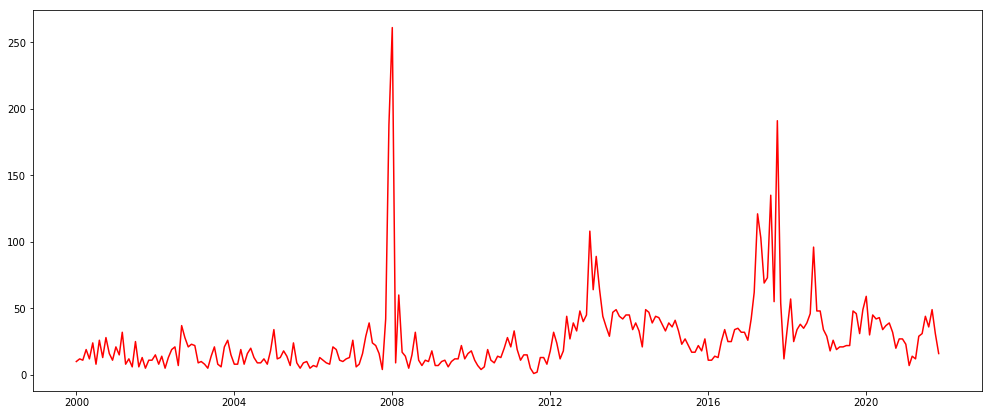

In [19]:
fig, ax = plt.subplots(figsize=(17, 7))

style = dict(size=12, color='black')

ax.plot('index','count', data=number_ev,color="r")

**We can see several peak. Grabbing information from web we plot the following graph**

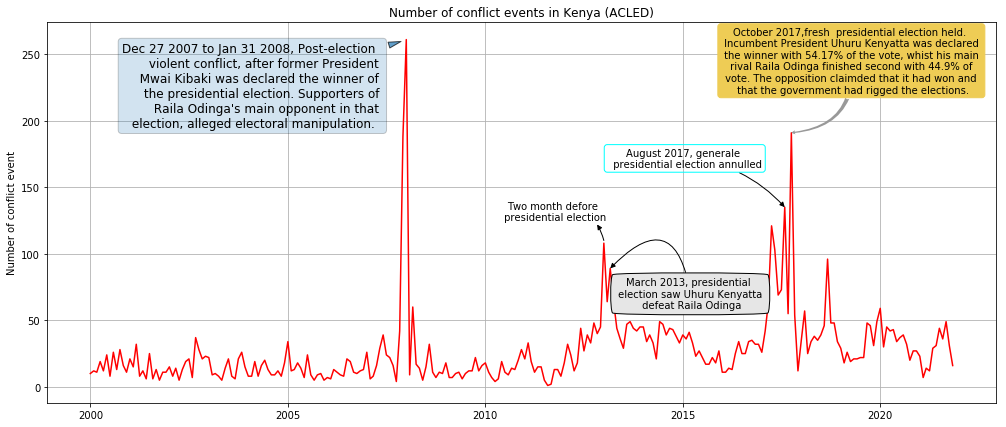

In [20]:
fig, ax = plt.subplots(figsize=(17, 7))

ax.plot('index','count', data=number_ev,color="r")

# Format the x axis each 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))

ax.grid(True)
plt.ylabel("Number of conflict event")
plt.title("Number of conflict events in Kenya (ACLED)")



# # Add annotate to the plot

ax.annotate("Dec 27 2007 to Jan 31 2008, Post-election  \n violent conflict,"+ 
         " after former President \n  Mwai Kibaki was declared the winner of \n the presidential election."+
        " Supporters of \n Raila Odinga's main opponent in that \n election, alleged electoral manipulation.  " ,
            xy=(datetime.strptime('2007-12-1',"%Y-%m-%d"), 260), xycoords='data',
            xytext=(-20, -45), size=12, ha='right', va="center", textcoords='offset points',
            bbox=dict(boxstyle="round", alpha=0.2),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.7))


ax.annotate('Two month defore \n presidential election',
            xy=(datetime.strptime('2013-1-1',"%Y-%m-%d"), 110),
            xycoords='data', ha='center', 
            xytext=(-50, 20),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="<|-"
                 ,shrinkA=0.02,shrinkB=0.02,fc="k",ec="k",
                            connectionstyle="arc3,rad=-0.5")) #, arrowprops=dict(facecolor='g',shrink=0.02))


ax.annotate('March 2013, presidential \n election saw Uhuru Kenyatta \n defeat Raila Odinga', 
            xy=(datetime.strptime('2013-3-1',"%Y-%m-%d"), 89),
            xycoords='data', ha='center', 
            xytext=(80, -40),
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="-|>"
                 ,shrinkA=0.02,shrinkB=0.02,fc="k",ec="k",connectionstyle="arc3,rad=1"));



ax.annotate('August 2017, generale \n  presidential election annulled', 
            xy=(datetime.strptime('2017-8-1',"%Y-%m-%d"), 135),
            xycoords='data', ha='center',
            xytext=(-100, 40),
            bbox=dict(boxstyle="round", fc="none", ec="cyan"),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="-|>"
                 ,shrinkA=0.02,shrinkB=0.02,fc="k",ec="k",connectionstyle="arc3,rad=-0.2"));



ax.annotate("October 2017,fresh  presidential election held. \n Incumbent President Uhuru Kenyatta was declared \n"+
            " the winner with 54.17% of the vote, whist his main \n rival Raila Odinga finished second with 44.9% of \n vote."+
            " The opposition claimded that it had won and \n that the government had rigged the elections.", 
            xy=(datetime.strptime('2017-10-1',"%Y-%m-%d"), 191),
            xycoords='data', ha='center',
            xytext=(60, 40),
            bbox=dict(boxstyle="round", fc="#EECC55", ec="#EECC55"),
            textcoords='offset points',arrowprops=dict(arrowstyle="fancy"
                 ,shrinkA=0.0,shrinkB=0.0,fc="0.6",ec="none",connectionstyle="arc3,rad=-0.5"));

> **We found that after December 2007 all several peak are close to a presidential election periode**

Let see which event are more occurs during those years 

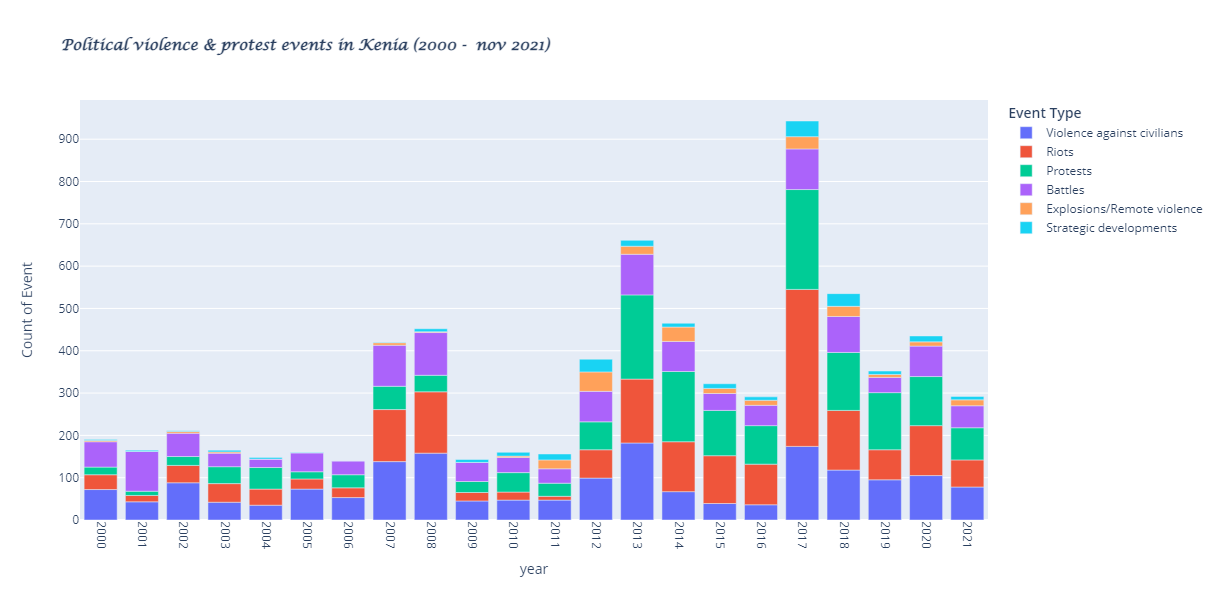

In [21]:
year_event = pd.crosstab(df.year,df.event_type).reset_index()

fig = px.bar(year_event, x="year", 
             y=["Violence against civilians","Riots","Protests","Battles","Explosions/Remote violence","Strategic developments"],
             title="<b>Political violence & protest events in Kenia (2000 -  nov 2021)<b>",
             labels={'value':'Count of Event','variable':'<b>Event Type'} ,
            width=1100, # Width of map
            height=600
            )
fig.update_layout(titlefont={'size': 15, 'family':'Serif'},
    # barmode='group',  # comment this line to see stacked bar
    xaxis_tickangle=90,
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()


> 2007-2008 `Violence against civilians` and `Riots`

> 2013 `Violence against civilians` , `Riots` and `Protests `

> 2017 `Violence against civilians` , `Riots` and `Protests `

> Are we expected a same scenario in August 2022?

In [22]:
# event distribution by event_type and county

county_event_count=df.pivot_table(index="event_type",
                                  columns=["admin1"],
                                  values="event_date",
                                  aggfunc="count",)
county_event_count

admin1                      Baringo  Bomet  Bungoma  Busia  Elgeyo Marakwet  \
event_type                                                                    
Battles                        45.0    1.0     25.0    4.0             17.0   
Explosions/Remote violence      NaN    NaN      NaN    NaN              NaN   
Protests                       19.0   20.0     28.0   22.0             14.0   
Riots                          12.0   17.0     33.0   38.0             13.0   
Strategic developments          8.0    NaN      4.0    2.0              2.0   
Violence against civilians     66.0    8.0     39.0   19.0             35.0   

admin1                      Embu  Garissa  Homa Bay  Isiolo  Kajiado  \
event_type                                                             
Battles                      2.0     85.0       3.0    47.0     17.0   
Explosions/Remote violence   NaN     53.0       NaN     3.0      2.0   
Protests                    23.0     25.0      20.0    16.0     12.0   
Riots                       49.0     27.0      72.0    17.0     21.0   
Strategic developments       NaN     26.0       2.0     6.0      1.0   
Violence against civilians   9.0     86.0      13.0    56.0     11.0   

admin1                      Kakamega  Kericho  Kiambu  Kilifi  Kirinyaga  \
event_type                                                                 
Battles                         12.0      6.0    17.0    15.0        3.0   
Explosions/Remote violence       NaN      NaN     NaN     2.0        NaN   
Protests                        50.0     14.0    84.0    34.0       18.0   
Riots                           65.0     27.0    59.0    43.0       28.0   
Strategic developments           2.0      NaN     5.0     6.0        1.0   
Violence against civilians      24.0      9.0    39.0    22.0        8.0   

admin1                      Kisii  Kisumu  Kitui  Kwale  Laikipia  Lamu  \
event_type                                                                
Battles                      27.0    16.0    1.0   23.0      30.0  56.0   
Explosions/Remote violence    NaN     NaN    NaN    4.0       NaN  25.0   
Protests                     40.0    84.0   25.0   25.0      21.0  27.0   
Riots                        40.0   120.0   29.0   14.0      17.0   9.0   
Strategic developments        2.0     2.0    3.0    4.0       6.0  15.0   
Violence against civilians   27.0    40.0   13.0   21.0      49.0  39.0   

admin1                      Machakos  Makueni  Mandera  Marsabit  Meru  \
event_type                                                               
Battles                          6.0      2.0    103.0      96.0  10.0   
Explosions/Remote violence       1.0      NaN     73.0       1.0   NaN   
Protests                        36.0     10.0     11.0       7.0  19.0   
Riots                           25.0     11.0      8.0      11.0  45.0   
Strategic developments           1.0      NaN     21.0       3.0   4.0   
Violence against civilians      12.0      5.0    125.0      84.0  24.0   

admin1                      Migori  Mombasa  Muranga  Nairobi  Nakuru  Nandi  \
event_type                                                                     
Battles                       18.0     43.0     10.0    137.0    81.0    5.0   
Explosions/Remote violence     NaN     14.0      NaN     35.0     NaN    NaN   
Protests                      24.0    118.0     36.0    378.0    88.0   16.0   
Riots                         69.0     88.0     30.0    394.0   113.0   13.0   
Strategic developments         4.0     14.0      NaN     37.0    12.0    NaN   
Violence against civilians    27.0     67.0     19.0    233.0    98.0    5.0   

admin1                      Narok  Nyamira  Nyandarua  Nyeri  Samburu  Siaya  \
event_type                                                                     
Battles                      51.0      3.0        9.0   13.0     29.0    7.0   
Explosions/Remote violence    NaN      NaN        NaN    NaN      NaN    NaN   
Protests                  

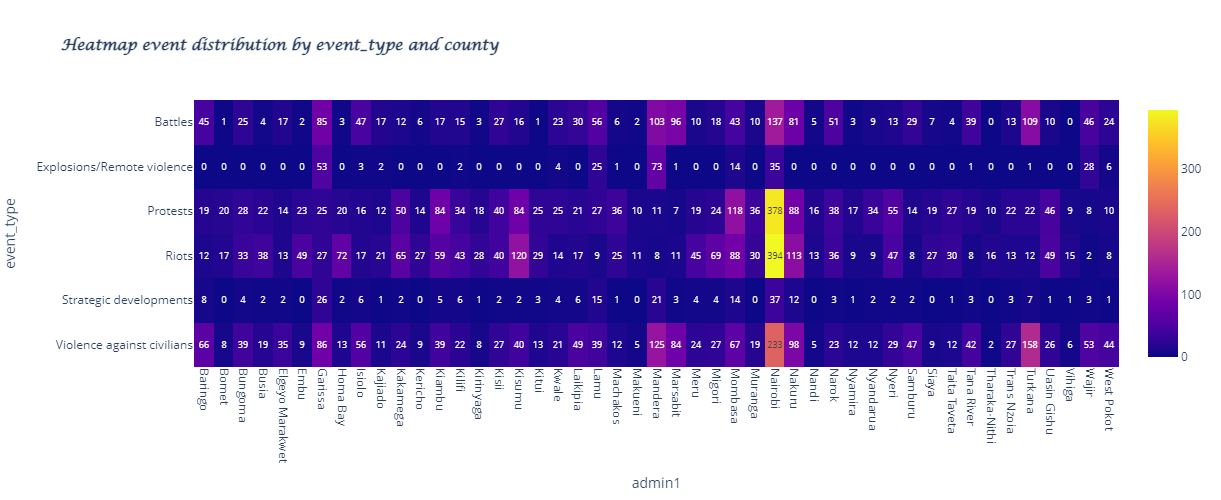

In [23]:
fig = px.imshow(county_event_count.fillna(0), 
                text_auto=True,
                width=1000,
                height=500,
               aspect="auto",
               title="<b>Heatmap event distribution by event_type and county<b>")
fig.update_layout(xaxis_tickangle=90,
                  titlefont={'size': 15, 'family':'Serif'},)
fig.show()

> We can see that `Nairobi` is the center of all event

### Fatalities trend

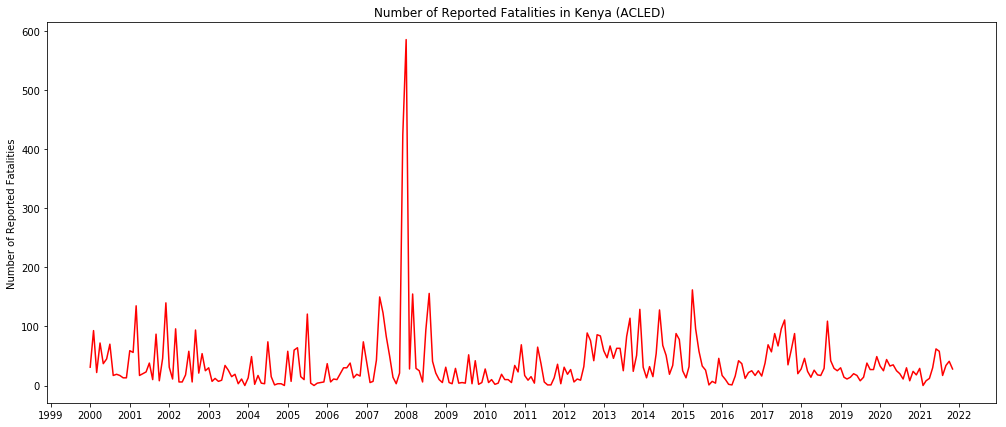

In [24]:
# fatalities trends using event_date

fig, ax = plt.subplots(figsize=(17, 7))

number_fatalities = df["fatalities"].groupby([df['event_date'].dt.year.rename('year'), 
             df['event_date'].dt.month.rename('month')]).agg({'sum'})

number_fatalities.index = [pd.datetime(year, month,1)
                   for (year,month) in number_fatalities.index]

number_fatalities.reset_index(inplace=True)

ax.plot('index','sum', data=number_fatalities,color="r")

# Format the x axis 
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))

# ax.grid(True)
plt.ylabel("Number of Reported Fatalities")
plt.title("Number of Reported Fatalities in Kenya (ACLED) ");

In [25]:
fatalities_trend = alt.Chart(number_fatalities)\
            .mark_line(point=False)\
            .encode(
                alt.X('index:T', #timeUnit='yearmonthdate',
                      axis=alt.Axis(values=[f"01-01-{s}" for s in range(2000,2022,5)]),
                      scale=alt.Scale(domain=['01-01-1999','01-01-2022']),
                      title=" "),
                alt.Y('sum',title="reported fatalities "),
            color=alt.value("purple") ,
                tooltip=['sum','index'])\
            .properties(
                width=950,
                height=400,
                title="Total reported fatalities from conflict in Kenya over the years")
fatalities_trend

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

alt.Chart(...)

> This peak represent the post election violence that reported the high number of death in 2007-2008

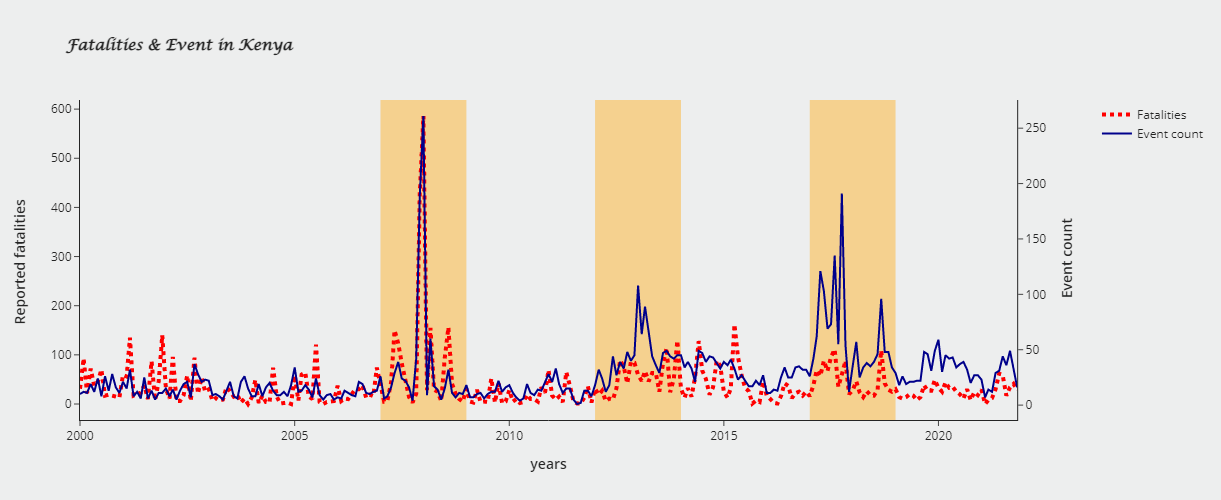

In [26]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(y=number_fatalities["sum"],
                         x=number_fatalities["index"],
                         name = 'Fatalities',
                         line=dict(color='red', width=4, dash='dot')
                         )
             )

fig.add_trace(go.Scatter(y=number_ev["count"],
                         x=number_ev["index"] ,
                         name = 'Event count',
                         line=dict(color='darkblue', width=2, dash='solid')
                         ),
              secondary_y=True,
             )

fig.update_layout(title='<b> Fatalities & Event in Kenya<b>',
                  xaxis_title='<b>years<b>',
                  yaxis_title='<b>Reported fatalities <b>',
                  titlefont={'size': 15, 'family':'Serif'},
                  template='simple_white',
                  showlegend=True,
                  paper_bgcolor='#edeeee',
                  plot_bgcolor='#edeeee',
                  width=1000, height=500,
                 )

fig.add_vrect(
    x0='2007', x1='2009',
    fillcolor="orange", opacity=0.4,
    layer="below", line_width=0,
),

fig.add_vrect(
    x0='2017', x1='2019',
    fillcolor="orange", opacity=0.4,
    layer="below", line_width=0,
),

fig.add_vrect(
    x0='2012', x1='2014',
    fillcolor="orange", opacity=0.4,
    layer="below", line_width=0,
),

fig.update_yaxes(title_text="<b> Event count</b>", secondary_y=True)
fig.show()

### Interaction 

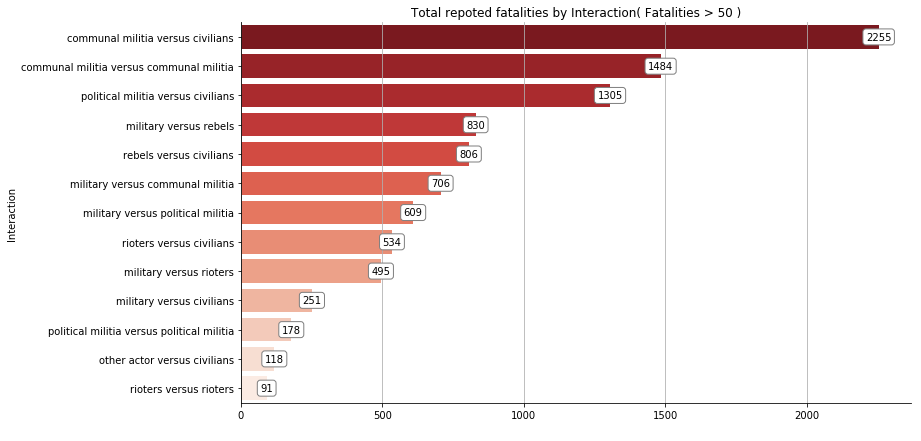

In [27]:

X=df.groupby(['interaction',])[['fatalities']].sum().sort_values("fatalities",ascending = False)
X=X[X.fatalities>50]

colors = sns.color_palette('Reds', len(X))
colors.reverse()

f, ax = plt.subplots(1,1, figsize=(12,7))


sns.barplot(y=X.index,x='fatalities',data=X, palette=colors,)

plt.grid(axis='x')
# annotation 
a=list(X.fatalities)
for index,i in enumerate(a):   
    y= str(round(i))
    plt.annotate(y,xy=(i,index),xycoords='data',bbox=dict(boxstyle="round", fc="white", ec="gray"),
             xytext=(-0,-3),textcoords='offset points', ha='center')

plt.xlabel(" ",)
plt.ylabel("Interaction",)
plt.title("Total repoted fatalities by Interaction( Fatalities > 50 )")
sns.despine();

> communal militia cause the most death in Kenya, following by political militia  

In [28]:
# Total fatalities  by event_type and county

event_interaction = df.pivot_table(index="event_type",
                                  columns=["interaction"],
                                  values="fatalities",
                                  aggfunc="sum",)
event_interaction.drop([col for col, val in event_interaction.sum().iteritems() if val < 1], axis=1, inplace=True)
event_interaction.drop([col for col, val in event_interaction.sum(axis=1).iteritems() if val < 1], axis=0, inplace=True)
event_interaction

interaction                 communal militia versus civilians  \
event_type                                                      
Battles                                                   NaN   
Explosions/Remote violence                               30.0   
Protests                                                  NaN   
Riots                                                     NaN   
Strategic developments                                    0.0   
Violence against civilians                             2225.0   

interaction                 communal militia versus communal militia  \
event_type                                                             
Battles                                                       1484.0   
Explosions/Remote violence                                       NaN   
Protests                                                         NaN   
Riots                                                            NaN   
Strategic developments                                           0.0   
Violence against civilians                                       NaN   

interaction                 communal militia versus other  \
event_type                                                  
Battles                                              23.0   
Explosions/Remote violence                            0.0   
Protests                                              NaN   
Riots                                                 NaN   
Strategic developments                                NaN   
Violence against civilians                            NaN   

interaction                 military versus civilians  \
event_type                                              
Battles                                           NaN   
Explosions/Remote violence                        3.0   
Protests                                          NaN   
Riots                                             NaN   
Strategic developments                            0.0   
Violence against civilians                      248.0   

interaction                 military versus communal militia  \
event_type                                                     
Battles                                                704.0   
Explosions/Remote violence                               2.0   
Protests                                                 NaN   
Riots                                                    NaN   
Strategic developments                                   0.0   
Violence against civilians                               NaN   

interaction                 military versus military  military versus other  \
event_type                                                                    
Battles                                         31.0                   20.0   
Explosions/Remote violence                       NaN                    NaN   
Protests                                         NaN                    NaN   
Riots                                            NaN                    NaN   
Strategic developments                           NaN                    0.0   
Violence against civilians                       NaN                    NaN   

interaction                 military versus political militia  \
event_type                                                      
Battles                                                 585.0   
Explosions/Remote violence                               24.0   
Protests                                                  NaN   
Riots                                                     NaN   
Strategic developments                                    0.0   
Violence against civilians                                NaN   

interaction                 military versus protesters  \
event_type                                               
Battles                                            NaN   
Explosions/Remote violence                         NaN   
Protests                                          36.0   

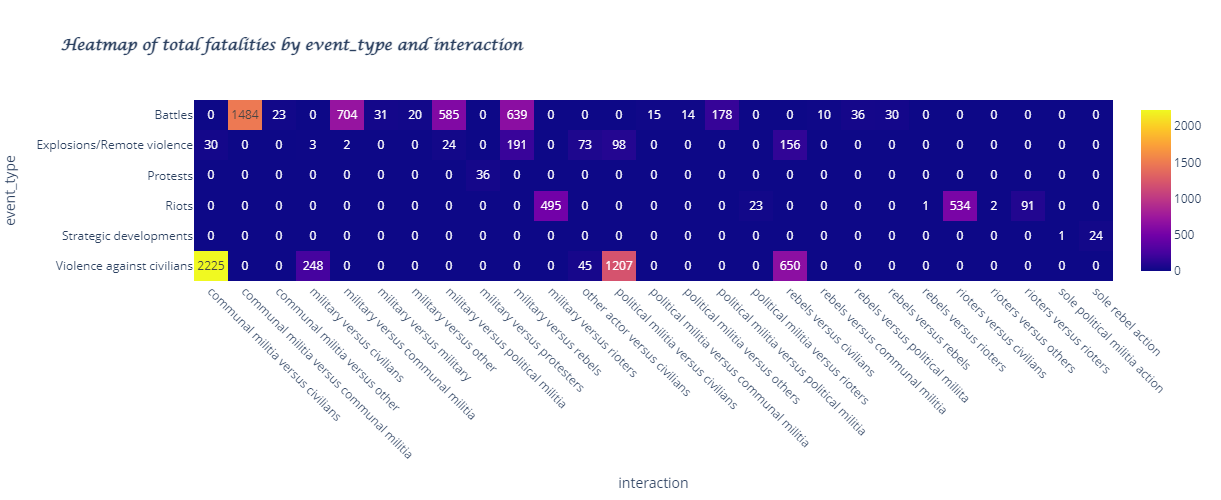

In [29]:
fig = px.imshow(event_interaction.fillna(0), 
                text_auto=True,
                width=1000,
                    height=500,
               aspect="auto",
              title="<b>Heatmap of total fatalities by event_type and interaction<b>")
fig.update_layout(xaxis_tickangle=45,
                  titlefont={'size': 15, 'family':'Serif'},)
           
fig.show()

> **Battles & Violence against civilians cause the most death, we observe this also by looking at the map of incidence conflict event** 

let look into Battles and violence against civilians

In [30]:
Battles = df[df["event_type"]=="Battles"]
battles_event = pd.crosstab(Battles['year'],Battles['interaction']).reset_index()
# battles_event

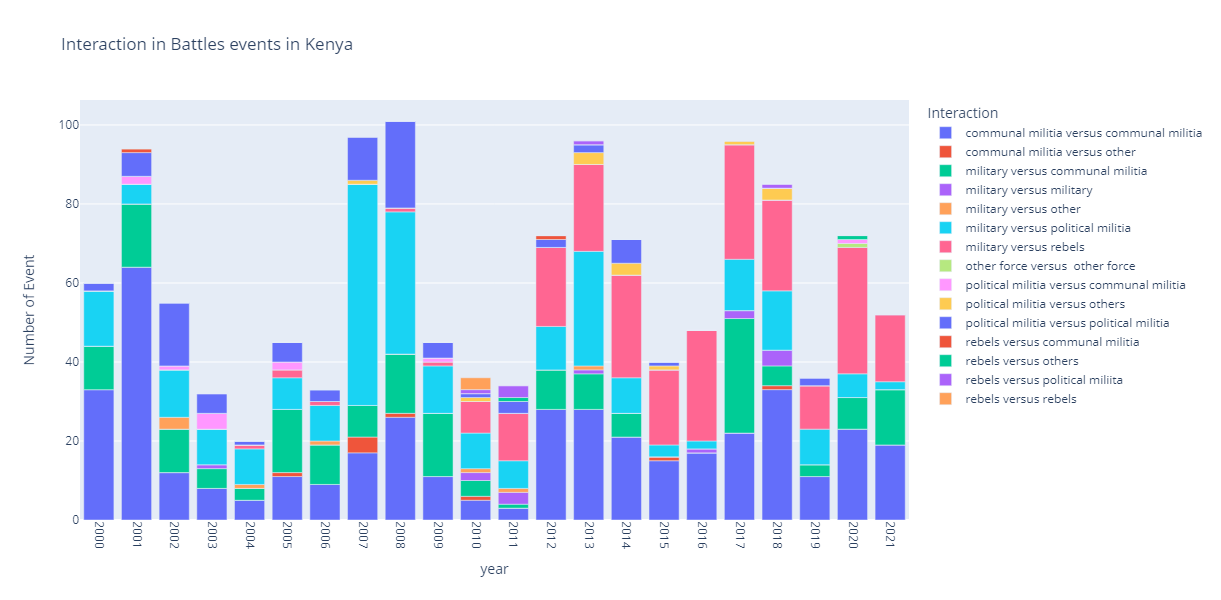

In [31]:
fig = px.bar(battles_event, x="year", 
             y=battles_event.columns[1:],
             title="Interaction in Battles events in Kenya",
             labels={'value':'Number of Event','variable':'Interaction'} ,
            width=1000, # Width of map
            height=600
            )
fig.update_layout(
    # barmode='group',  # comment this line to see stacked bar
    xaxis_tickangle=90,
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

we can observe many ethnic conflict (communal militia versus communal militia), also poliical conflict (militaty force versus political militia )
and from 2010 many rebels attack (military versus rebels)

In [33]:
Violences = df[df["event_type"]=="Violence against civilians"]
Violences_event = pd.crosstab(Violences['year'],Violences['interaction']).reset_index()
Violences_event

interaction  year  communal militia versus civilians  \
0            2000                                 39   
1            2001                                 24   
2            2002                                 40   
3            2003                                 15   
4            2004                                 21   
5            2005                                 51   
6            2006                                 34   
7            2007                                 29   
8            2008                                 53   
9            2009                                 21   
10           2010                                 12   
11           2011                                 14   
12           2012                                 30   
13           2013                                 60   
14           2014                                 14   
15           2015                                 10   
16           2016                                 14   
17           2017                                 53   
18           2018                                 31   
19           2019                                 16   
20           2020                                 18   
21           2021                                 37   

interaction  military versus civilians  other actor versus civilians  \
0                                    5                             1   
1                                    6                             0   
2                                   11                             0   
3                                    7                             0   
4                                    6                             0   
5                                    8                             1   
6                                    2                             2   
7                                    7                             3   
8                                   15                             1   
9                                    4                             2   
10                                   5                             0   
11                                   6                             0   
12                                  16                             0   
13                                  20                             0   
14                                   1                             3   
15                                   3                             0   
16                                   3                             0   
17                                  36                             1   
18                                  37                             0   
19                                  27                             0   
20                                  58                             2   
21                                  14                             1   

interaction  political militia versus civilians  rebels versus civilians  
0                                            25                        2  
1                                            13                        0  
2                                            37                        0  
3                                            20                        0  
4                                             8                        0  
5                                            10                        3  
6                                            14                        1  
7                                            99                        0  
8                                            89                        0  
9                                            17                        1  
10                                           28                        2  
11                                           24                        3  
12                                           46                        7  
13  

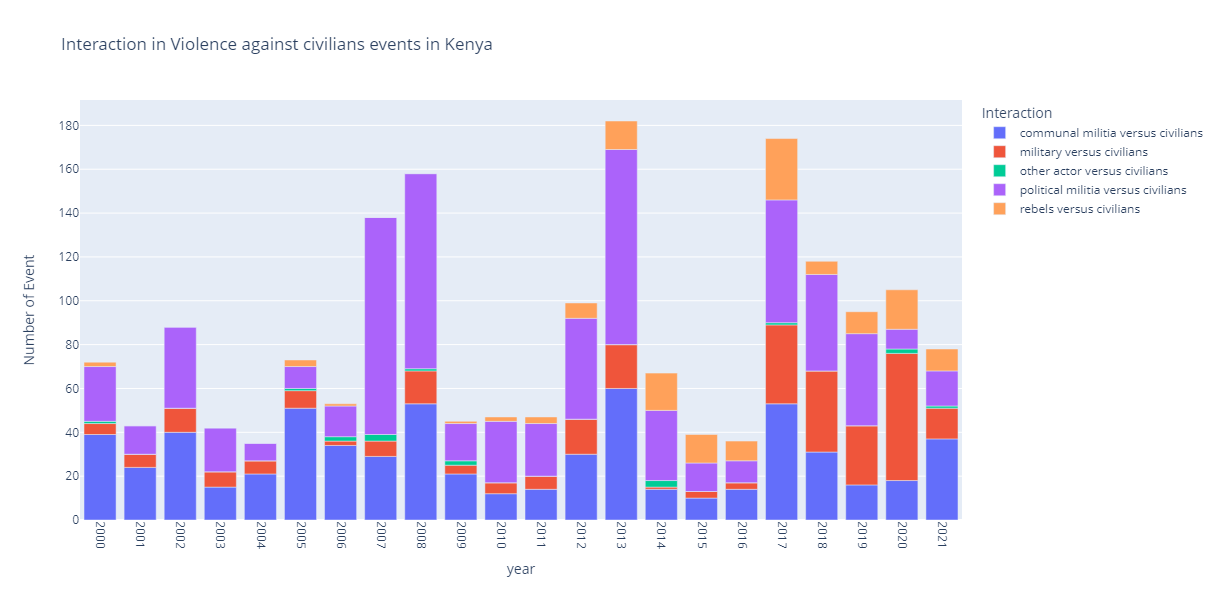

In [36]:
fig = px.bar(Violences_event, x="year", 
             y=Violences_event.columns[1:],
             title="Interaction in Violence against civilians events in Kenya ",
             labels={'value':'Number of Event','variable':'Interaction'} ,
            width=1000, # Width of map
            height=600
            )
fig.update_layout(
    # barmode='group',  # comment this line to see stacked bar
    xaxis_tickangle=90,
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

We observe that political militia and communal militia  are the most violents  against civilians

In [37]:
ethnic_conflict=df[df["interaction"]=="communal militia versus communal militia"]

# let combine actor1 and actor2 together 
act = ethnic_conflict["actor1"].to_list() +  ethnic_conflict["actor2"].to_list()
act=pd.DataFrame(act,columns=["actor"])
print(len(act))
act.head()

846


actor
0         Turkana Ethnic Militia (Kenya)
1         Turkana Ethnic Militia (Kenya)
2  Maasai-Siria Sub-Clan Militia (Kenya)
3           Pokot Ethnic Militia (Kenya)
4        Marakwet Ethnic Militia (Kenya)

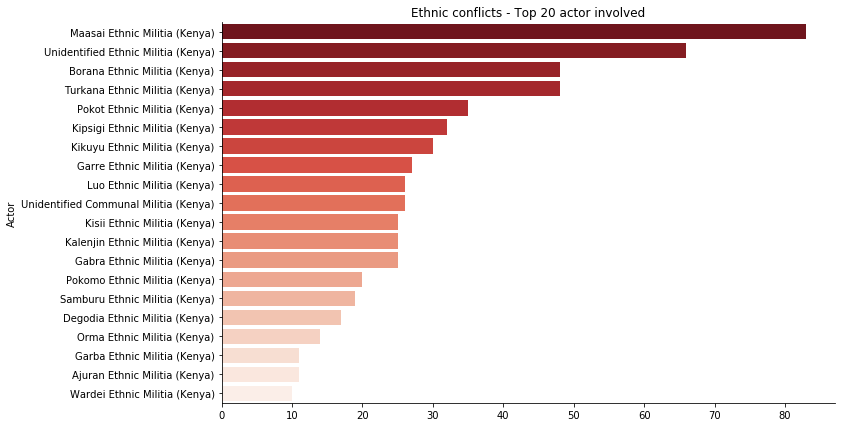

In [38]:
f, ax = plt.subplots(1,1, figsize=(11,7))

# Set the color palette in reverse
colors = sns.color_palette('Reds', len(act.actor.value_counts().index[0:20]))
colors.reverse()

# plot Ethnic conflict to 20 actor involved
sns.countplot(y=act.actor, order =act.actor.value_counts().index[0:20], palette=colors)
plt.xlabel(" ")
plt.ylabel("Actor")
plt.title("Ethnic conflicts - Top 20 actor involved");
sns.despine()